In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
data = pd.read_csv("AB_NYC_2019.csv")
copy_data = data.copy()

In [3]:
data.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


# Exploratory Data Analysis

***What are the dimensions (shape) of the dataset?***

In [4]:
data.shape

(48895, 16)

***What are the names of the columns and their data types?***

In [5]:
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

***Are there any missing values in the dataset? If so, how many and in which columns?***

In [6]:
missing_values = data.isnull()
missing_values_count = missing_values.sum(axis=0)
print(missing_values_count)

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


***What is the distribution of values for each numerical column?***

In [7]:
numerical_columns = data.select_dtypes(include='number')
distribution = numerical_columns.describe()
print(distribution)

                 id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.00

***What are the unique values and their frequencies for categorical columns?***

In [8]:
categorical_columns = data.select_dtypes(include='object')
categorical_columns["room_type"].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [9]:
data["room_type"] = data["room_type"].str.replace("Entire home/apt","Entire house")

# Data Cleaning


There are four columns with null values 
**name**
**host_name**
**last_review**
**reviews_per_month**

In [10]:
data.rename(columns={'name': 'description'}, inplace=True)

In [11]:
data["description"].fillna("N/A",inplace=True)

In [12]:
data["host_name"].fillna("N/A",inplace=True)

In [13]:
#renaming columns
data.rename(columns={'neighbourhood_group': 'regions', 'neighbourhood': 'locality'}, inplace=True)

In [14]:
data.rename(columns={"calculated_host_listings_count":"no_of_listings"},inplace=True)

In [15]:
data.head()

,id,description,host_id,host_name,regions,locality,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,no_of_listings,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire house,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire house,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire house,80,10,9,2018-11-19,0.10,1,0


In [16]:
#fixinng missing values 
data['last_review'].fillna(pd.NaT, inplace=True)
data['last_review'] = pd.to_datetime(data['last_review'], format='%Y-%m-%d')
data['last_review'].dtype

dtype('<M8[ns]')

In [17]:

data['no_of_listings'] = data["no_of_listings"].astype("float")
data["reviews_per_month"] = data["reviews_per_month"].astype("float")


In [18]:
filt = data["reviews_per_month"].notnull() 
mean = data.loc[filt, "reviews_per_month"].mean() 
mean

1.3732214298586618

In [19]:
data["reviews_per_month"].fillna(mean,inplace=True)

***How correlated are the numerical columns? Are there any strong relationships?***

In [20]:
columns_of_interest = ["price","minimum_nights","number_of_reviews","reviews_per_month","no_of_listings","availability_365"]
correlation_matrix = data[columns_of_interest].corr()
corr_df = pd.DataFrame(correlation_matrix)
corr_df

,price,minimum_nights,number_of_reviews,reviews_per_month,no_of_listings,availability_365
price,1.000000,0.042799,-0.047954,-0.022373,0.057472,0.081829
minimum_nights,0.042799,1.000000,-0.080116,-0.091942,0.127960,0.144303
number_of_reviews,-0.047954,-0.080116,1.000000,0.530093,-0.072376,0.172028
reviews_per_month,-0.022373,-0.091942,0.530093,1.000000,-0.006701,0.162980
no_of_listings,0.057472,0.127960,-0.072376,-0.006701,1.000000,0.225701
availability_365,0.081829,0.144303,0.172028,0.162980,0.225701,1.000000


Strong Correlation : no_of_listings - reviews_per_month
                   | availability_365 -     no_of_listings

***Are there any outliers in the numerical data? How extreme are they?***

visually exploring the dataset for any outliers

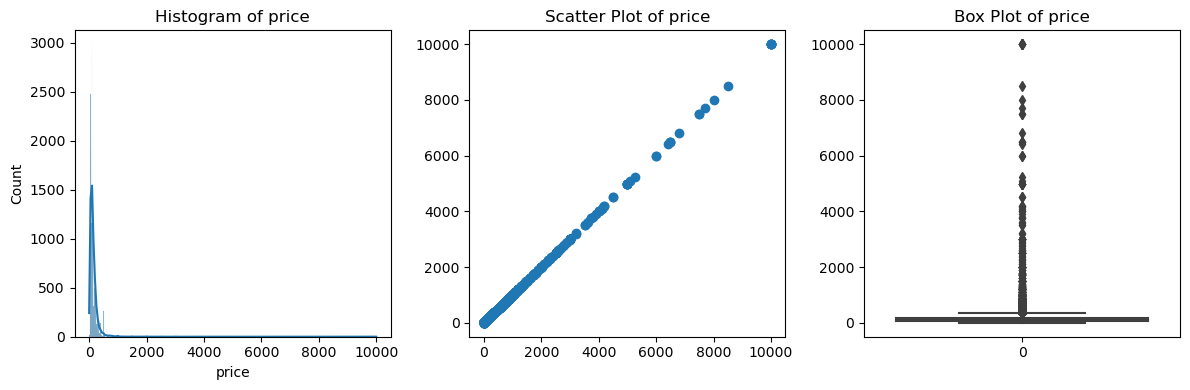

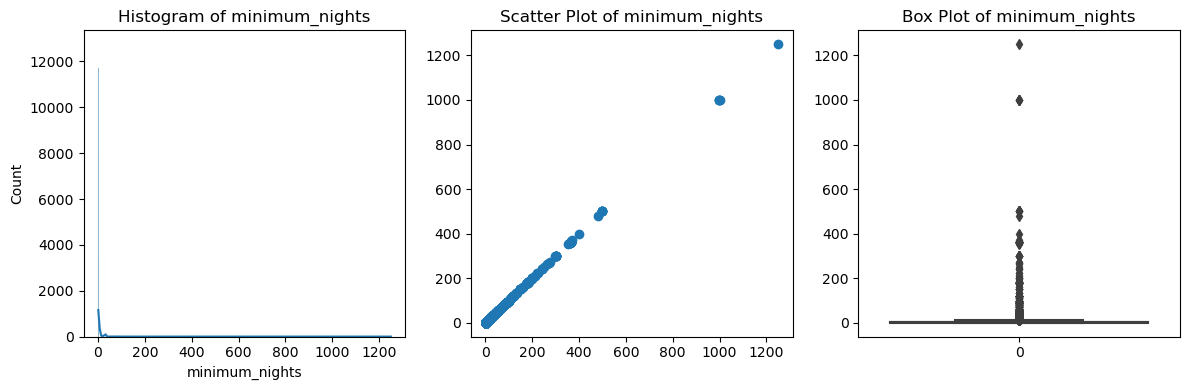

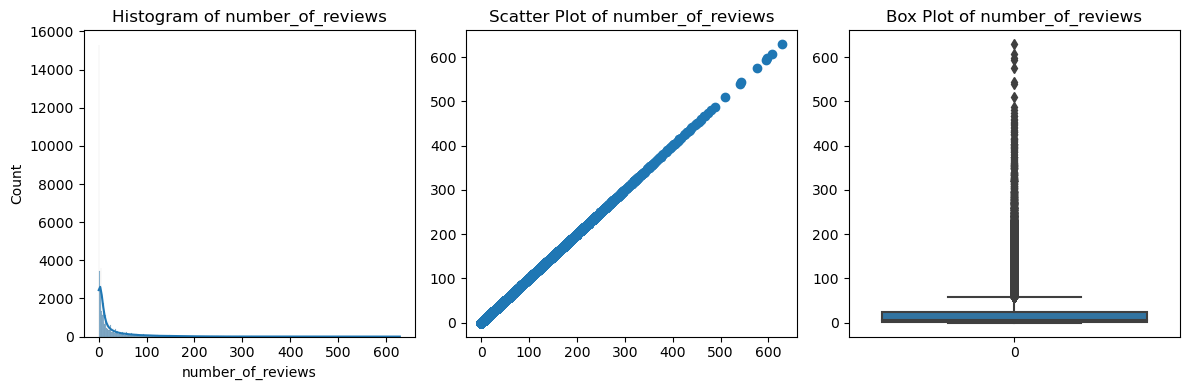

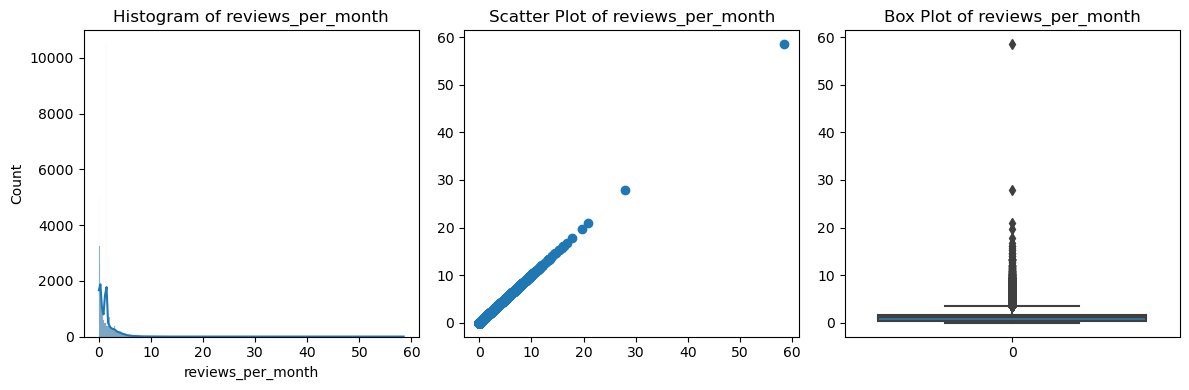

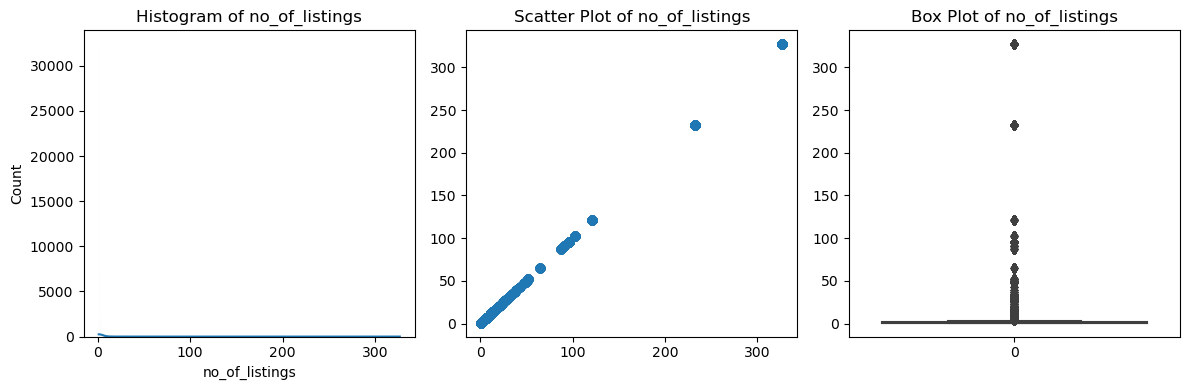

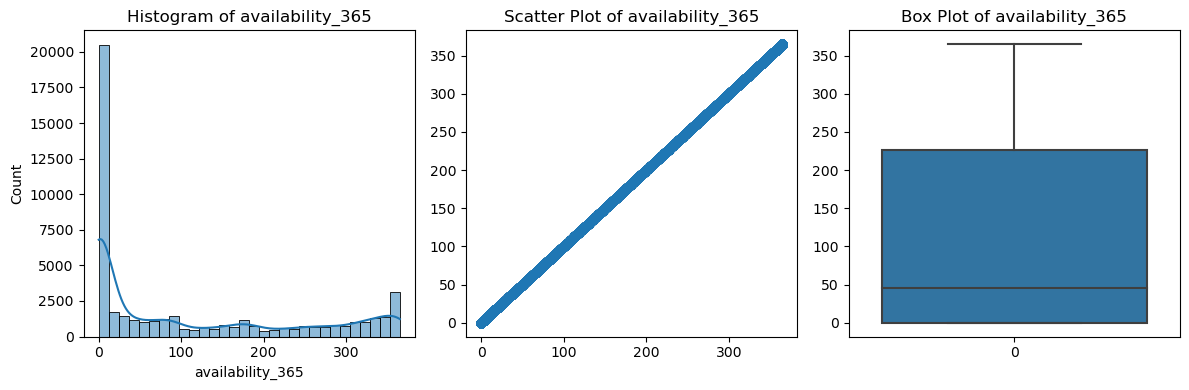

In [21]:

# Assuming your DataFrame is called 'data'
for column in columns_of_interest:
    dtype = data[column].dtype
    
    # Check if the column is numerical
    
    plt.figure(figsize=(12, 4))
        
    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(data[column], kde=True)
    plt.title('Histogram of ' + column)
        
    # Scatter plot
    plt.subplot(1, 3, 2)
    plt.scatter(data[column], data[column])
    plt.title('Scatter Plot of ' + column)
        
    # Box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(data[column])
    plt.title('Box Plot of ' + column)
        
    plt.tight_layout()
    plt.show()


*finding the outliers for each numercial feature of our interest*

In [22]:
def find_outliers(data, columns_of_interest):
    outliers = {}
    
    for column in columns_of_interest:
        if data[column].dtype in ['int64', 'float64']:
            q1 = data[column].quantile(0.25)
            q3 = data[column].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            
            column_outliers = list(data[(data[column] < lower_bound) | (data[column] > upper_bound)][column])
            outliers[column] = column_outliers
    

    return outliers


In [23]:
outliers = find_outliers(data,columns_of_interest)

In [24]:
#finding no of outlier per each column
no_of_ouliers = {}
for key, value in outliers.items():
    no_of_ouliers[key] = len(value)

no_of_ouliers

{'price': 2972,
 'minimum_nights': 6607,
 'number_of_reviews': 6021,
 'reviews_per_month': 4103,
 'no_of_listings': 7081,
 'availability_365': 0}

***What are the summary statistics (mean, median, min, max) for key variables?***

In [25]:
data[columns_of_interest].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,no_of_listings,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.497775,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.280000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,1.220000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


***What is the count of the type of rooms selected by users***

In [26]:
data["room_type"].value_counts()

Entire house    25409
Private room    22326
Shared room      1160
Name: room_type, dtype: int64

Conclusion : Most of guests either opt for private room or complete house

***Which are the most expensive and most affordable localities of new york***

In [27]:
grouped_data = data.groupby('locality')['price'].mean()
sorted_data = grouped_data.sort_values(ascending=False)
top_regions = sorted_data.head(3)  
print(top_regions)


locality
Fort Wadsworth    800.000000
Woodrow           700.000000
Tribeca           490.638418
Name: price, dtype: float64


Conclusion : Most expensive localities are **Fort Wadsworth** **Woodrow** and **Tribeca**

In [28]:
cheap_regions = sorted_data.tail(3)  
print(cheap_regions)

locality
Tremont        51.545455
Hunts Point    50.500000
Bull's Head    47.333333
Name: price, dtype: float64


Conclusion : Most expensive localities are **Tremont** **Hunts Point** and **Bull's Head**

**Avg cost of stay for a single night**

In [29]:
avg_cost_night =  data[data["minimum_nights"] == 1 ]["price"].mean()
print(avg_cost_night)

142.02287735849058


Conclusion : Avg cost per night is **142.02287735849058**

***Average cost for each kind of room for single day of stay***

In [30]:
avg_cost_per_room = data.groupby("room_type")["price"].mean()
print(avg_cost_per_room)


room_type
Entire house    211.794246
Private room     89.780973
Shared room      70.127586
Name: price, dtype: float64


Conclusions : Avg cost of stay in **Entire House** is **211.79**    |
               **Private room** is **89.7**     |
               **Shared room** is **70.12**